<a href="https://colab.research.google.com/github/aditiyafadillah/PROJECT_RNN/blob/master/ForecastCuaca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("Mencoba Forecast Cuaca")
import tensorflow as tf
print(tf.__version__)


Mencoba Forecast Cuaca
2.2.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/mohripan/Forecasting-Prediksi-Cuaca/master/testset.csv')

In [ ]:
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [ ]:
import os

In [ ]:
from tensorflow.keras.layers import Dense, RepeatVector, LSTM, Dropout
from tensorflow.keras.layers import Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model

In [ ]:
df[' _conds'].value_counts()

Haze                             47602
Smoke                            20760
Mist                              9375
Clear                             3129
Widespread Dust                   2856
Fog                               2760
Scattered Clouds                  2209
Partly Cloudy                     2091
Shallow Fog                       1860
Mostly Cloudy                     1537
Light Rain                        1302
Partial Fog                       1031
Patches of Fog                     901
Thunderstorms and Rain             486
Heavy Fog                          421
Light Drizzle                      414
Rain                               394
Unknown                            383
Blowing Sand                       378
Overcast                           326
Thunderstorm                       192
Light Thunderstorms and Rain       176
Drizzle                            112
Light Fog                           64
Light Thunderstorm                  64
Heavy Rain               

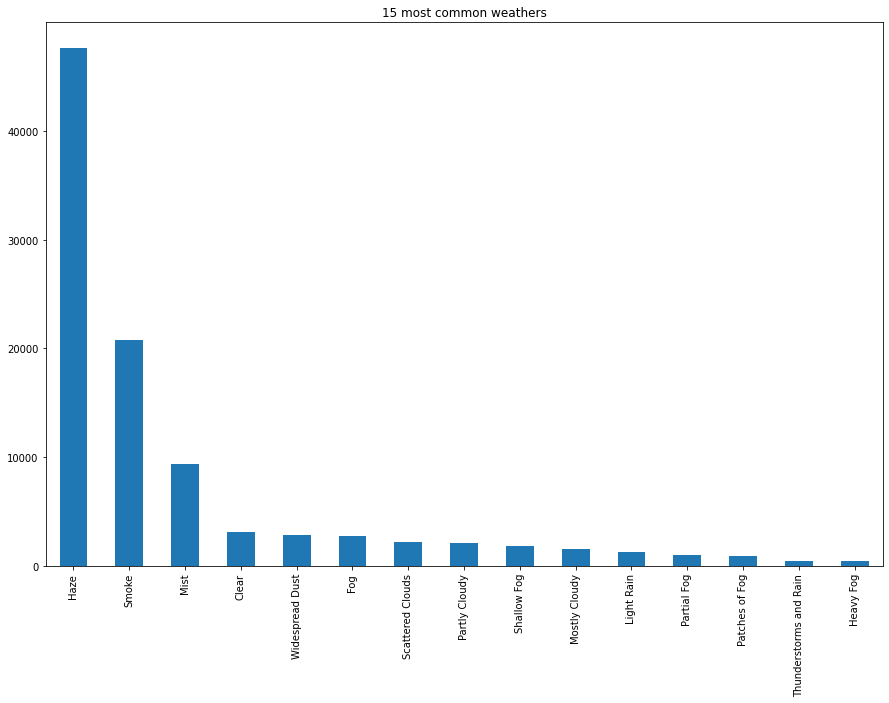

In [ ]:
plt.figure(figsize=(15,10))
df[' _conds'].value_counts().head(15).plot(kind='bar')

plt.title('15 most common weathers')
plt.show()

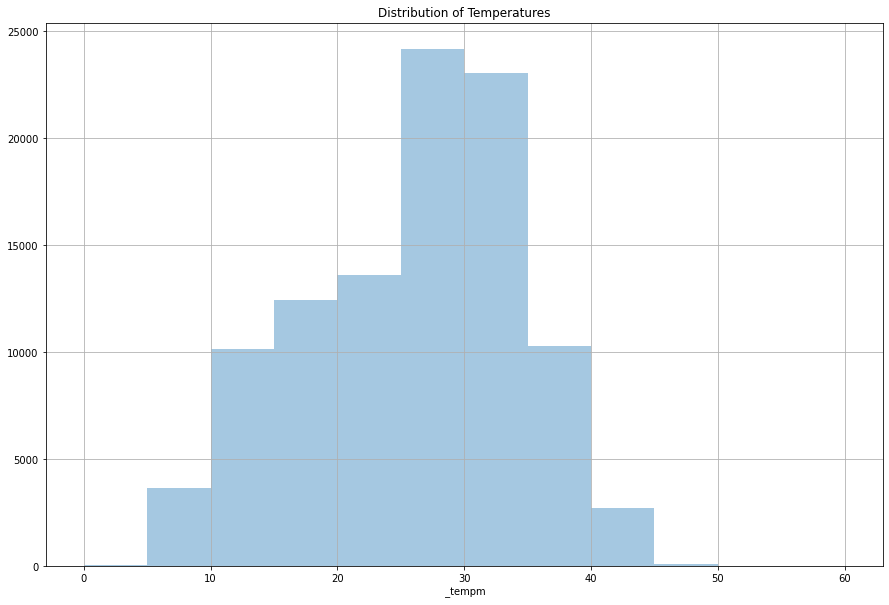

In [ ]:
plt.figure(figsize=(15, 10))
sns.distplot(df[' _tempm'],bins=[i for i in range(0,61,5)], kde=False)
plt.title("Distribution of Temperatures")
plt.grid()
plt.show()

In [ ]:
df['datetime_utc'] = pd.to_datetime(df['datetime_utc'])

In [ ]:
df['datetime_utc']

0        1996-11-01 11:00:00
1        1996-11-01 12:00:00
2        1996-11-01 13:00:00
3        1996-11-01 14:00:00
4        1996-11-01 16:00:00
                 ...        
100985   2017-04-24 06:00:00
100986   2017-04-24 09:00:00
100987   2017-04-24 12:00:00
100988   2017-04-24 15:00:00
100989   2017-04-24 18:00:00
Name: datetime_utc, Length: 100990, dtype: datetime64[ns]

In [ ]:
df[' _tempm'].fillna(df[' _tempm'].mean(), inplace=True)

In [ ]:
df[' _tempm'].isna().sum()

0

In [ ]:
str(df['datetime_utc'][0])

'1996-11-01 11:00:00'

In [ ]:
def get_year(x):
  return x[0:4]

In [ ]:
def get_month(x):
  return x[5:7]

In [ ]:
df['year'] = df['datetime_utc'].apply(lambda x: get_year(str(x)))
df['month'] = df['datetime_utc'].apply(lambda x: get_month(str(x)))

In [ ]:
df['year']

0         1996
1         1996
2         1996
3         1996
4         1996
          ... 
100985    2017
100986    2017
100987    2017
100988    2017
100989    2017
Name: year, Length: 100990, dtype: object

In [ ]:
temp_year = pd.crosstab(df['year'], df['month'], values=df[' _tempm'], aggfunc='mean')

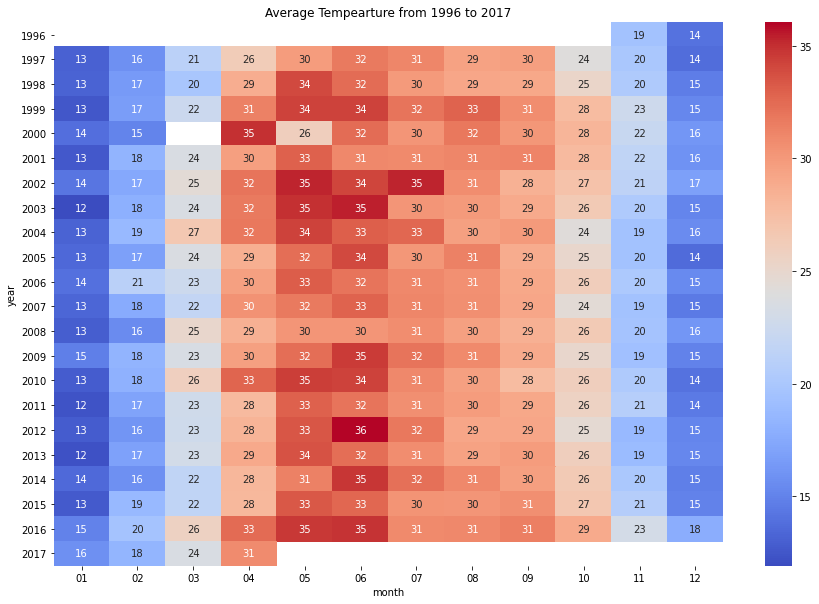

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(temp_year, cmap='coolwarm', annot=True)
plt.title("Average Tempearture from 1996 to 2017")
plt.show()

In [ ]:
df[' _hum'].isna().sum()

757

In [ ]:
df[' _hum'].fillna(df[' _hum'].mean(), inplace=True)

In [ ]:
humidity_year = pd.crosstab(df['year'], df['month'], values=df[' _hum'], aggfunc='mean')

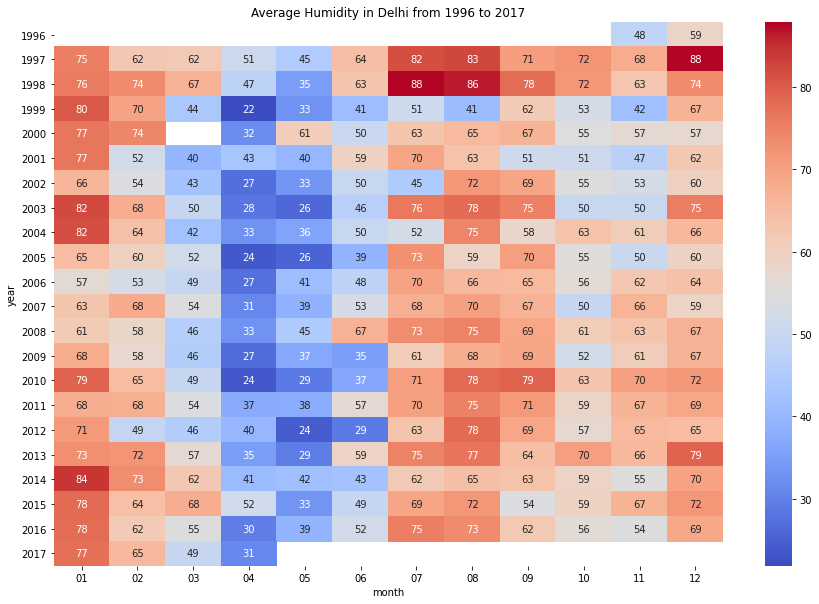

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(humidity_year, cmap='coolwarm', annot=True)
plt.title("Average Humidity in Delhi from 1996 to 2017")
plt.show()

In [ ]:
data = pd.DataFrame(list(df[' _tempm']), index=df['datetime_utc'], columns=['temp'])

In [ ]:
data

,temp
datetime_utc,
1996-11-01 11:00:00,30.0
1996-11-01 12:00:00,28.0
1996-11-01 13:00:00,24.0
1996-11-01 14:00:00,24.0
1996-11-01 16:00:00,23.0
...,...
2017-04-24 06:00:00,34.0
2017-04-24 09:00:00,38.0
2017-04-24 12:00:00,36.0


In [ ]:
data = data.resample('D').mean()

In [ ]:
data.temp.isna().sum()

141

In [ ]:
data.fillna(data['temp'].mean(), inplace=True)

In [ ]:
data.shape

(7480, 1)

In [ ]:
data

,temp
datetime_utc,
1996-11-01,22.333333
1996-11-02,22.916667
1996-11-03,21.791667
1996-11-04,22.722222
1996-11-05,27.800000
...,...
2017-04-20,34.500000
2017-04-21,34.250000
2017-04-22,32.900000


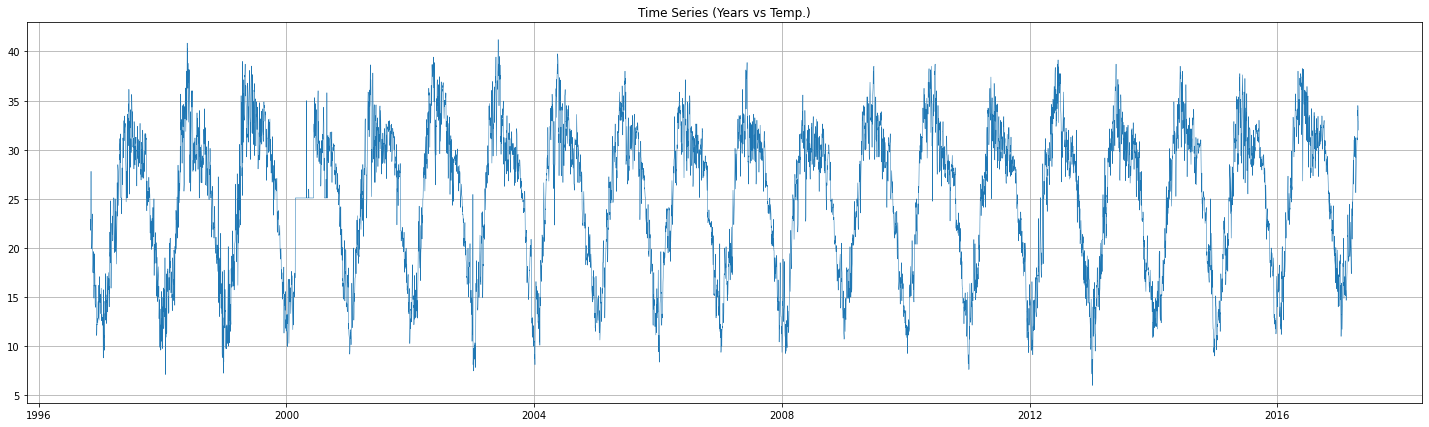

In [ ]:
plt.figure(figsize=(25, 7))
plt.plot(data, linewidth=.5)
plt.grid()
plt.title("Time Series (Years vs Temp.)")
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(-1,1))
data_scaled = scalar.fit_transform(data)

In [ ]:
data_scaled

array([[-0.07224714],
       [-0.0391131 ],
       [-0.10301445],
       ...,
       [ 0.52795217],
       [ 0.52653214],
       [ 0.47683109]])

In [ ]:
steps = 30
inp = []
out = []
for i in range(len(data_scaled)- (steps)):
    inp.append(data_scaled[i:i+steps])
    out.append(data_scaled[i+steps])

In [ ]:
inp=np.asanyarray(inp)
out=np.asanyarray(out)

In [ ]:
x_train = inp[:7300,:,:]
x_test = inp[7300:,:,:]    
y_train = out[:7300]    
y_test= out[7300:]

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping
early_stop = EarlyStopping(monitor = "loss", mode = "min", patience = 7)
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(30,1)))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(30))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(Bidirectional(LSTM(128, activation='relu')))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

In [ ]:
history = model.fit(x_train,y_train,epochs=300, verbose=1, callbacks = [early_stop] )

Epoch 1/300
229/229 [==============================] - 92s 404ms/step - loss: 0.0226
Epoch 2/300
229/229 [==============================] - 92s 402ms/step - loss: 0.0121
Epoch 3/300
229/229 [==============================] - 93s 407ms/step - loss: 0.0107
Epoch 4/300
229/229 [==============================] - 92s 402ms/step - loss: 0.0118
Epoch 5/300
229/229 [==============================] - 86s 374ms/step - loss: 0.0104
Epoch 6/300
229/229 [==============================] - 82s 360ms/step - loss: 0.0107
Epoch 7/300
229/229 [==============================] - 82s 358ms/step - loss: 0.0108
Epoch 8/300
229/229 [==============================] - 82s 358ms/step - loss: 0.0106
Epoch 9/300
229/229 [==============================] - 82s 358ms/step - loss: 0.0101
Epoch 10/300
229/229 [==============================] - 82s 358ms/step - loss: 0.0096
Epoch 11/300
229/229 [==============================] - 84s 367ms/step - loss: 0.0097
Epoch 12/300
229/229 [==============================] - 84s 369

In [ ]:
model.save("./regressor.hdf5")

In [ ]:
predict = model.predict(x_test)

In [ ]:
predict = scalar.inverse_transform(predict)

In [ ]:
Ytesting = scalar.inverse_transform(y_test)

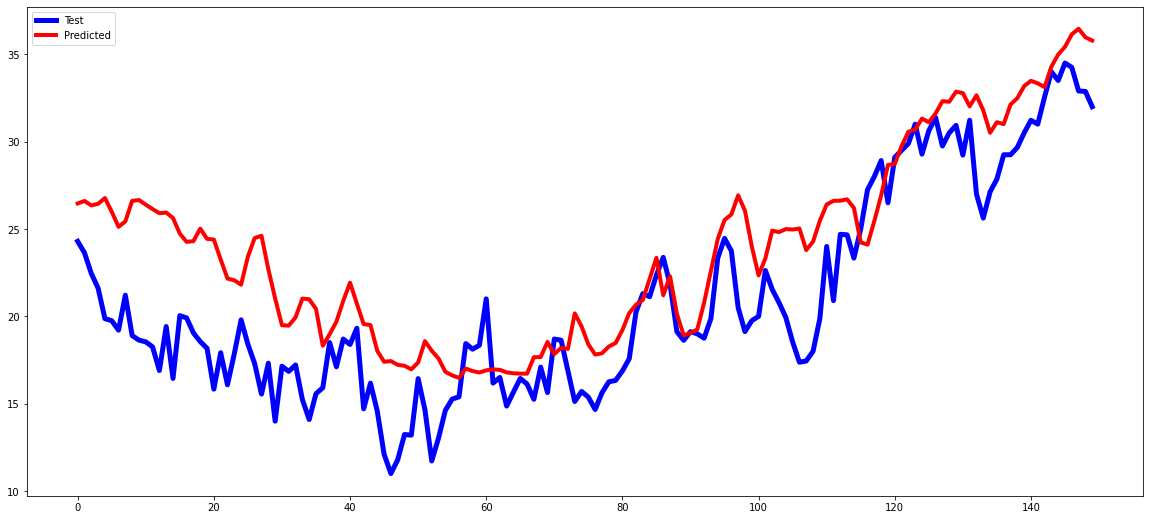

In [ ]:
plt.figure(figsize=(20,9))
plt.plot(Ytesting , 'blue', linewidth=5)
plt.plot(predict,'r' , linewidth=4)
plt.legend(('Test','Predicted'))
plt.show()